In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [10]:
N = 4000  # 列数
alpha = 0.5  # 圧縮率
M = int(alpha*N)  # 行数
rho = 0.2  # 非零成分の割合

In [25]:
SNR = 60  # 信号対雑音比
kappa = 50  # 条件数
P = 1  # ノード数
T = 30  # 反復回数
sim = 100  # 実験数

In [12]:
x = [bernouli_gaussian(N, rho) for _ in range(sim)]
mode = ['MF', 'PINV', 'LMMSE']

# i.i.d.ガウス行列での信号再構成

In [13]:
MSE_iidG_oamp = np.empty((sim, 3, T+1))
MSE_iidG_doamp = np.empty((sim, 3, T+1))
CommCost_iidG_doamp = np.empty((sim, 3, T))

In [14]:
for i in tqdm(range(sim)):
    iidG = iidGaussian(M, N, m=0, v=1/M)

    oamp = [OAMP(iidG.A, x[i], SNR), 
            OAMP(iidG.A, x[i], SNR), 
            OAMP(iidG.A, x[i], SNR)]

    doamp = [D_OAMP(iidG.A, x[i], SNR, P), 
             D_OAMP(iidG.A, x[i], SNR, P), 
             D_OAMP(iidG.A, x[i], SNR, P)] 

    # OAMP 
    oamp[0].estimate(T, ord='MF')
    oamp[1].estimate(T, ord='PINV')
    oamp[2].estimate(T, ord='LMMSE')

    # D-OAMP 
    doamp[0].estimate(T, ord='MF')
    doamp[1].estimate(T, ord='PINV')
    doamp[2].estimate(T, ord='LMMSE')
    
    for j in range(3):
        MSE_iidG_oamp[i, j] = oamp[j].mse
        MSE_iidG_doamp[i, j] = doamp[j].mse
        CommCost_iidG_doamp[i, j] = doamp[j].communication_cost

100%|██████████| 100/100 [3:56:08<00:00, 141.68s/it]


In [15]:
MSE_iidG_oamp_mean = np.empty((3, T+1))
MSE_iidG_doamp_mean = np.empty((3, T+1))
CommCost_iidG_doamp_mean = np.empty((3, T))

for i in range(3):
    MSE_iidG_oamp_mean[i] = np.mean(MSE_iidG_oamp[:, i], axis=0)
    MSE_iidG_doamp_mean[i] = np.mean(MSE_iidG_doamp[:, i], axis=0)
    CommCost_iidG_doamp_mean[j] = np.mean(CommCost_iidG_doamp[:, i], axis=0)

/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard


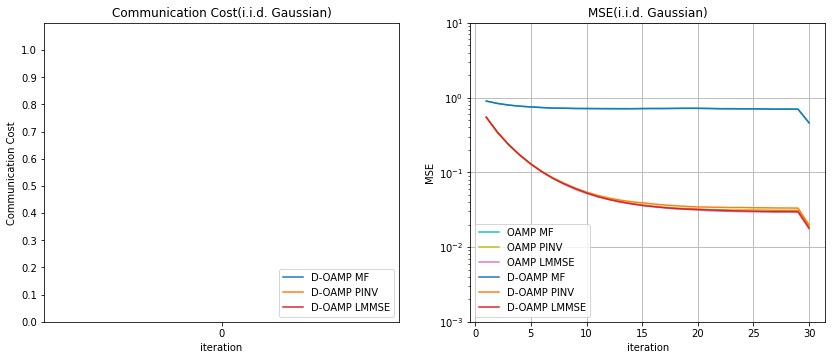

In [16]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
plt_CC(CommCost_iidG_doamp_mean[0], 'D-OAMP MF', T, N, P, 'tab:blue')
plt_CC(CommCost_iidG_doamp_mean[1], 'D-OAMP PINV', T, N, P, 'tab:orange')
plt_CC(CommCost_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, N, P, 'tab:red')


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')
plt.grid()

/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard


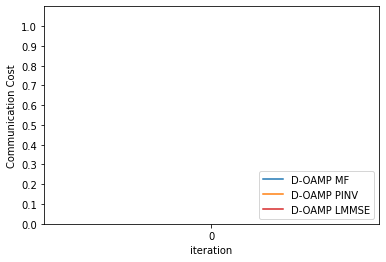

In [17]:
plt_CC(CommCost_iidG_doamp_mean[0], 'D-OAMP MF', T, N, P, 'tab:blue')
plt_CC(CommCost_iidG_doamp_mean[1], 'D-OAMP PINV', T, N, P, 'tab:orange')
plt_CC(CommCost_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, N, P, 'tab:red')

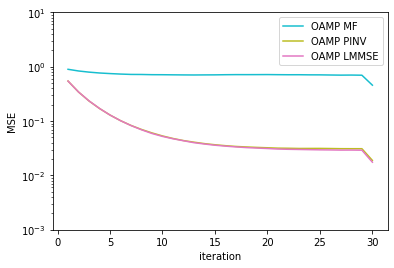

In [18]:
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

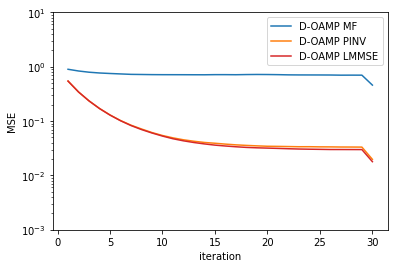

In [19]:
plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')

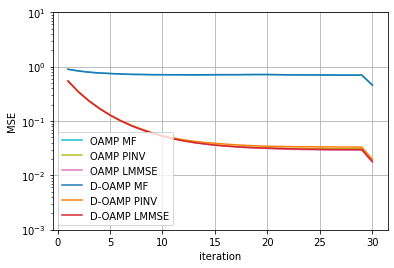

In [20]:
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')
plt.grid()

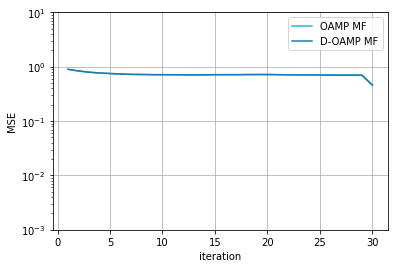

In [21]:
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt.grid()

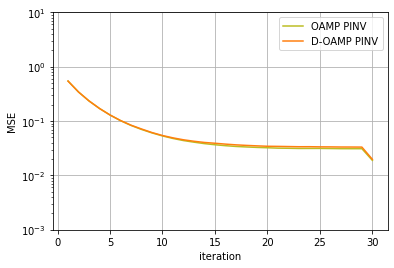

In [22]:
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt.grid()

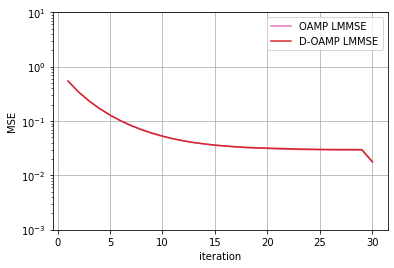

In [23]:
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')
plt.grid()

# ユニタリ不変行列での信号再構成

In [24]:
MSE_UniInv_oamp = np.empty((sim, 3, T+1))
MSE_UniInv_doamp = np.empty((sim, 3, T+1))
CommCost_UniInv_doamp = np.empty((sim, 3, T))

In [26]:
for i in tqdm(range(sim)):
    UniInv = UniInvar(M, N, kappa)

    oamp = [OAMP(UniInv.A, x[i], SNR), 
            OAMP(UniInv.A, x[i], SNR), 
            OAMP(UniInv.A, x[i], SNR)]

    doamp = [D_OAMP(UniInv.A, x[i], SNR, P), 
             D_OAMP(UniInv.A, x[i], SNR, P), 
             D_OAMP(UniInv.A, x[i], SNR, P)] 

    # OAMP 
    oamp[0].estimate(T, ord='MF')
    oamp[1].estimate(T, ord='PINV')
    oamp[2].estimate(T, ord='LMMSE')

    # D-OAMP 
    doamp[0].estimate(T, ord='MF')
    doamp[1].estimate(T, ord='PINV')
    doamp[2].estimate(T, ord='LMMSE')
    
    for j in range(3):
        MSE_UniInv_oamp[i, j] = oamp[j].mse
        MSE_UniInv_doamp[i, j] = doamp[j].mse
        CommCost_UniInv_doamp[i, j] = doamp[j].communication_cost

100%|██████████| 100/100 [11:42:09<00:00, 421.29s/it]


In [27]:
MSE_UniInv_oamp_mean = np.empty((3, T+1))
MSE_UniInv_doamp_mean = np.empty((3, T+1))
CommCost_UniInv_doamp_mean = np.empty((3, T))

for i in range(3):
    MSE_UniInv_oamp_mean[i] = np.mean(MSE_UniInv_oamp[:, i], axis=0)
    MSE_UniInv_doamp_mean[i] = np.mean(MSE_UniInv_doamp[:, i], axis=0)
    CommCost_UniInv_doamp_mean[j] = np.mean(CommCost_UniInv_doamp[:, i], axis=0)

/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard


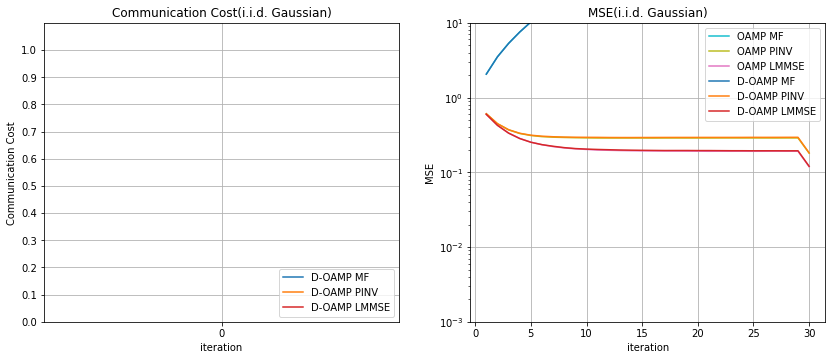

In [28]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
plt_CC(CommCost_UniInv_doamp_mean[0], 'D-OAMP MF', T, N, P, 'tab:blue')
plt_CC(CommCost_UniInv_doamp_mean[1], 'D-OAMP PINV', T, N, P, 'tab:orange')
plt_CC(CommCost_UniInv_doamp_mean[2], 'D-OAMP LMMSE', T, N, P, 'tab:red')


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

plt_MSE(MSE_UniInv_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt_MSE(MSE_UniInv_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt_MSE(MSE_UniInv_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')
plt.grid()

/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/Documents/Lassolver/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard


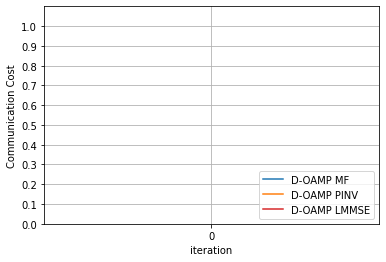

In [29]:
plt_CC(CommCost_UniInv_doamp_mean[0], 'D-OAMP MF', T, N, P, 'tab:blue')
plt_CC(CommCost_UniInv_doamp_mean[1], 'D-OAMP PINV', T, N, P, 'tab:orange')
plt_CC(CommCost_UniInv_doamp_mean[2], 'D-OAMP LMMSE', T, N, P, 'tab:red')

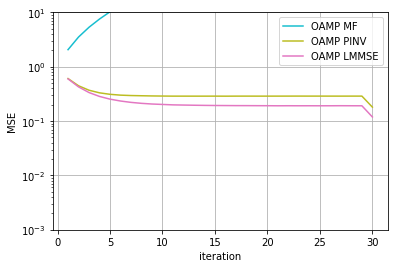

In [30]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

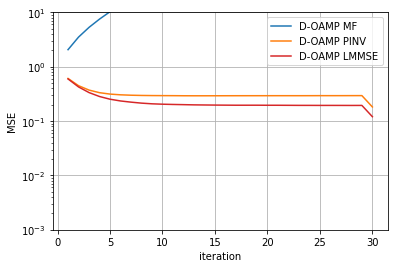

In [31]:
plt_MSE(MSE_UniInv_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt_MSE(MSE_UniInv_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt_MSE(MSE_UniInv_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')

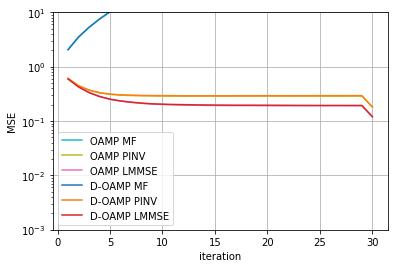

In [32]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

plt_MSE(MSE_UniInv_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt_MSE(MSE_UniInv_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt_MSE(MSE_UniInv_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')
plt.grid()

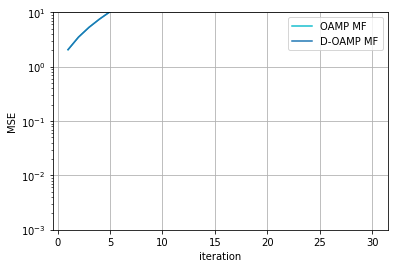

In [33]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue')
plt.grid()

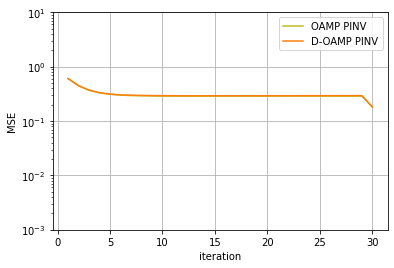

In [34]:
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange')
plt.grid()

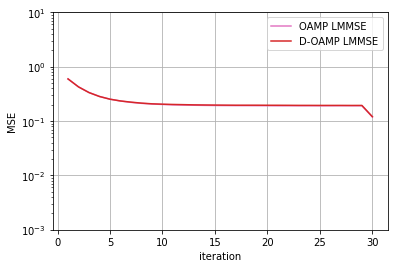

In [35]:
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')
plt_MSE(MSE_UniInv_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red')
plt.grid()